In [1]:
import os
import re
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import csv
from sklearn import metrics
import tensorflow as tf
num_gpus_available = len(tf.config.experimental.list_physical_devices('GPU'))
!pip install transformers
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification
import pandas as pd
import numpy as np

     |████████████████████████████████| 2.6 MB 12.8 MB/s 
     |████████████████████████████████| 636 kB 37.6 MB/s 
     |████████████████████████████████| 3.3 MB 27.2 MB/s 
     |████████████████████████████████| 895 kB 42.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
data=pd.read_csv("textmooddata.csv",skipinitialspace=True,  engine="python")
labels=data['Mood']
data2=pd.read_csv("train.csv",skipinitialspace=True, engine="python")
texts=data2['text']

In [3]:
from sklearn.model_selection import train_test_split
texts=data['Text']
labels=data['Mood']
textstr=[]
for i in texts:
  textstr.append(str(i))
data['Mood_ENC']=data['Mood']
data['Mood_ENC']=data['Mood_ENC'].replace(data['Mood_ENC'].unique(),[i for i in range(len(data['Mood_ENC'].unique()))])
labels=data['Mood_ENC']
training_sentences, validation_sentences, training_labels, validation_labels = train_test_split(textstr, labels, test_size=.2)

In [4]:
training_labels.unique()

array([0, 1, 4, 3, 2])

In [5]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
tokenizer([training_sentences[1]], padding=True, max_length=128)


{'input_ids': [[101, 12603, 6441, 5994, 4268, 1998, 4368, 2788, 9670, 3141, 1024, 2472, 12603, 24978, 8299, 1024, 1013, 1013, 1056, 1012, 2522, 1013, 1022, 14141, 28418, 23749, 2243, 2546, 1001, 24978, 8299, 1024, 1013, 1013, 1056, 1012, 2522, 1013, 4720, 2226, 2271, 2549, 24475, 2078, 2509, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [6]:
train_encodings = tokenizer(training_sentences,
                            truncation=True,
                            padding=True)
val_encodings = tokenizer(validation_sentences,
                            truncation=True,
                            padding=True)
train_dataset = tf.data.Dataset.from_tensor_slices((
                            dict(train_encodings),
                            training_labels
                            ))
val_dataset = tf.data.Dataset.from_tensor_slices((
                            dict(val_encodings),
                            validation_labels
                            ))

In [7]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=5)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_transform', 'vocab_projector', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'dropout_19', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [8]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])

In [9]:
model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
distilbert (TFDistilBertMain multiple                  66362880  
_________________________________________________________________
pre_classifier (Dense)       multiple                  590592    
_________________________________________________________________
classifier (Dense)           multiple                  3845      
_________________________________________________________________
dropout_19 (Dropout)         multiple                  0         
Total params: 66,957,317
Trainable params: 66,957,317
Non-trainable params: 0
_________________________________________________________________


In [11]:
#steps_per_epoch=20,
history=model.fit(train_dataset.batch(16),
          epochs=10,
          batch_size=16,
          validation_data=val_dataset.batch(16))

Epoch 1/10
381/381 [==============================] - 118s 310ms/step - loss: 1.3022 - accuracy: 0.4813 - val_loss: 1.1081 - val_accuracy: 0.5909
Epoch 2/10
381/381 [==============================] - 117s 307ms/step - loss: 0.7665 - accuracy: 0.7300 - val_loss: 1.0029 - val_accuracy: 0.6566
Epoch 3/10
381/381 [==============================] - 117s 306ms/step - loss: 0.3578 - accuracy: 0.8867 - val_loss: 1.0954 - val_accuracy: 0.6724
Epoch 4/10
381/381 [==============================] - 116s 306ms/step - loss: 0.1831 - accuracy: 0.9404 - val_loss: 1.2374 - val_accuracy: 0.6822
Epoch 5/10
381/381 [==============================] - 116s 305ms/step - loss: 0.1166 - accuracy: 0.9634 - val_loss: 1.2919 - val_accuracy: 0.6888
Epoch 6/10
381/381 [==============================] - 117s 307ms/step - loss: 0.0892 - accuracy: 0.9726 - val_loss: 1.2843 - val_accuracy: 0.7131
Epoch 7/10
381/381 [==============================] - 117s 307ms/step - loss: 0.0541 - accuracy: 0.9831 - val_loss: 1.4749 -

In [12]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
model_stat=pd.DataFrame({
    "Epoch":[i+1 for i in range(10)],
    "Model Loss":train_loss,
    "Model Accuracy":train_acc
})
model_stat.to_csv("model_BERT.csv")
model_stat

,Epoch,Model Loss,Model Accuracy
0,1,1.302211,0.481281
1,2,0.766512,0.730049
2,3,0.357804,0.886699
3,4,0.183136,0.940394
4,5,0.116561,0.963383
5,6,0.089208,0.972578
6,7,0.054122,0.983087
7,8,0.049559,0.983744
8,9,0.045060,0.986700
9,10,0.037277,0.987685


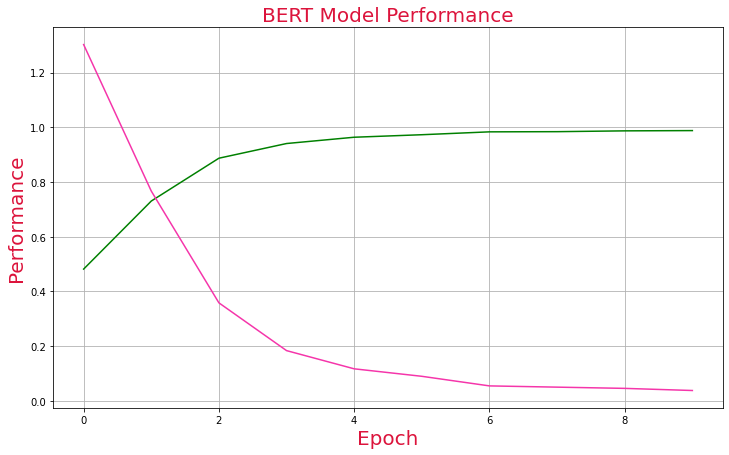

In [14]:
import matplotlib.pyplot as plt

collist=["#008000","#F535AA"]
model_stat.iloc[:,2].plot(kind="line",figsize=(12,7),color=collist[0])
model_stat.iloc[:,1].plot(kind="line",figsize=(12,7),color=collist[1])
plt.title("BERT Model Performance",fontsize=20,color="#DC143C")
plt.xlabel("Epoch",fontsize=20,color="#DC143C")
plt.ylabel("Performance",fontsize=20,color="#DC143C")
plt.grid()
plt.show()

In [16]:
print("===========================================================")
print("====================== Model Accuracy =====================")
print("===========================================================")
print("Average Training Accuracy of BERT(Model-1): ",round(model_stat['Model Accuracy'].median(),4)*100,"%")

print("===========================================================")
print("======================= Model Loss ========================")
print("===========================================================")
print("Average Training Loss of BERT(Model-1): ",round(model_stat['Model Loss'].min(),4)*100,"%")
print("===========================================================")

====================== Model Accuracy =====================
Average Training Accuracy of BERT(Model-1):  96.8 %
======================= Model Loss ========================
Average Training Loss of BERT(Model-1):  3.73 %


In [17]:
#steps_per_epoch=20,
history2=model.fit(train_dataset.batch(32),
          epochs=10,
          batch_size=32,
          validation_data=val_dataset.batch(32))

Epoch 1/10
191/191 [==============================] - 102s 532ms/step - loss: 0.0278 - accuracy: 0.9923 - val_loss: 1.5089 - val_accuracy: 0.7098
Epoch 2/10
191/191 [==============================] - 102s 537ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 1.6272 - val_accuracy: 0.7157
Epoch 3/10
191/191 [==============================] - 102s 533ms/step - loss: 0.0063 - accuracy: 0.9977 - val_loss: 1.7402 - val_accuracy: 0.7052
Epoch 4/10
191/191 [==============================] - 102s 533ms/step - loss: 0.0051 - accuracy: 0.9989 - val_loss: 1.7620 - val_accuracy: 0.7157
Epoch 5/10
191/191 [==============================] - 102s 533ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 1.8336 - val_accuracy: 0.7019
Epoch 6/10
191/191 [==============================] - 102s 537ms/step - loss: 0.0059 - accuracy: 0.9990 - val_loss: 1.7408 - val_accuracy: 0.7137
Epoch 7/10
191/191 [==============================] - 102s 533ms/step - loss: 0.0128 - accuracy: 0.9966 - val_loss: 1.8430 -

In [18]:
train_acc2 = history2.history['accuracy']
train_loss2 = history2.history['loss']
model_stat2=pd.DataFrame({
    "Epoch":[i+1 for i in range(10)],
    "Model Loss":train_loss2,
    "Model Accuracy":train_acc2
})
model_stat2.to_csv("model_BERT2.csv")
model_stat2

,Epoch,Model Loss,Model Accuracy
0,1,0.027775,0.992282
1,2,0.003521,0.999179
2,3,0.006251,0.997701
3,4,0.005078,0.998851
4,5,0.003450,0.999179
5,6,0.005887,0.999015
6,7,0.012849,0.996552
7,8,0.011344,0.996552
8,9,0.032989,0.989984
9,10,0.016872,0.995074


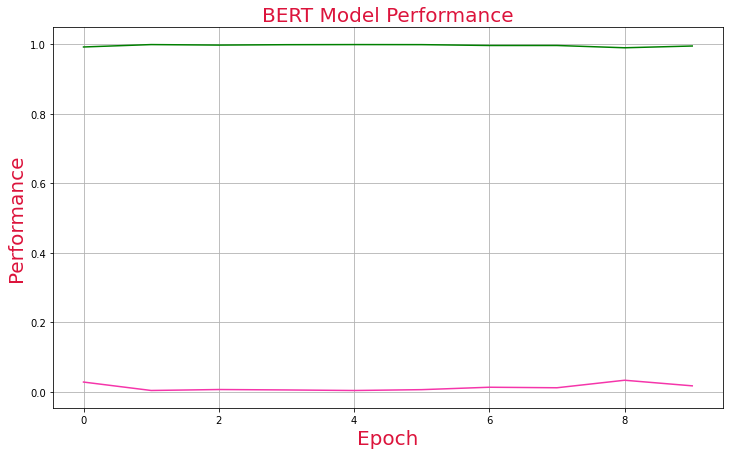

In [19]:
import matplotlib.pyplot as plt

collist=["#008000","#F535AA"]
model_stat2.iloc[:,2].plot(kind="line",figsize=(12,7),color=collist[0])
model_stat2.iloc[:,1].plot(kind="line",figsize=(12,7),color=collist[1])
plt.title("BERT Model Performance",fontsize=20,color="#DC143C")
plt.xlabel("Epoch",fontsize=20,color="#DC143C")
plt.ylabel("Performance",fontsize=20,color="#DC143C")
plt.grid()
plt.show()

In [21]:
print("===========================================================")
print("====================== Model Accuracy =====================")
print("===========================================================")
print("Average Training Accuracy of BERT(Model-2): ",round(model_stat2['Model Accuracy'].median(),4)*100,"%")

print("===========================================================")
print("======================= Model Loss ========================")
print("===========================================================")
print("Average Training Loss of BERT(Model-2): ",round(model_stat2['Model Loss'].min(),4)*100,"%")
print("===========================================================")

====================== Model Accuracy =====================
Average Training Accuracy of BERT(Model-2):  99.71 %
======================= Model Loss ========================
Average Training Loss of BERT(Model-2):  0.33999999999999997 %


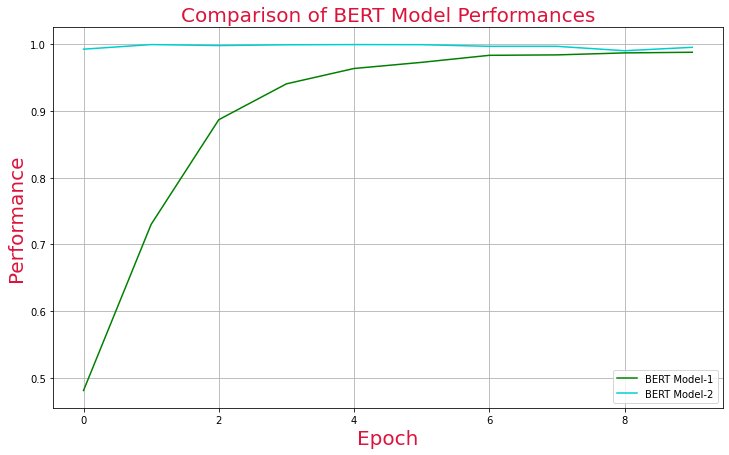

In [26]:
import matplotlib.pyplot as plt

collist=["#008000","#00CED1"]
model_stat.iloc[:,2].plot(kind="line",figsize=(12,7),color=collist[0],label="BERT Model-1")
model_stat2.iloc[:,2].plot(kind="line",figsize=(12,7),color=collist[1],label="BERT Model-2")
plt.title("Comparison of BERT Model Performances",fontsize=20,color="#DC143C")
plt.xlabel("Epoch",fontsize=20,color="#DC143C")
plt.ylabel("Performance",fontsize=20,color="#DC143C")
plt.grid()
plt.legend()
plt.show()

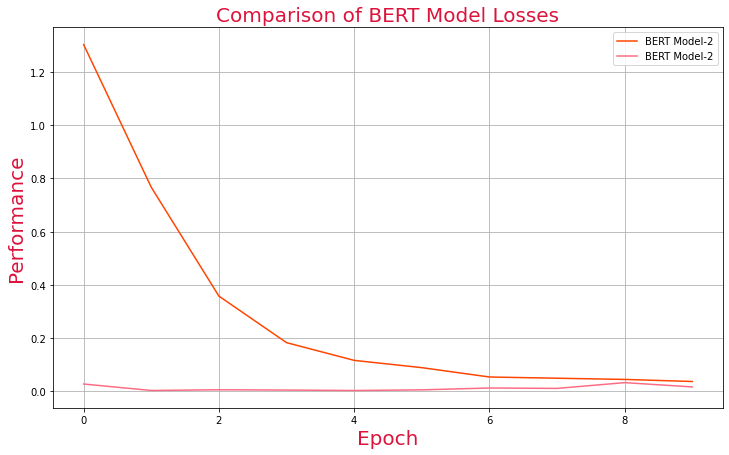

In [27]:
import matplotlib.pyplot as plt

collist=["#FF4500","#FC6C85"]
model_stat.iloc[:,1].plot(kind="line",figsize=(12,7),color=collist[0],label="BERT Model-2")
model_stat2.iloc[:,1].plot(kind="line",figsize=(12,7),color=collist[1],label="BERT Model-2")
plt.title("Comparison of BERT Model Losses",fontsize=20,color="#DC143C")
plt.xlabel("Epoch",fontsize=20,color="#DC143C")
plt.ylabel("Performance",fontsize=20,color="#DC143C")
plt.grid()
plt.legend()
plt.show()